# Заместитель
Паттерн заместитель (Proxy) - это структурный паттерн проектирования, который позволяет создать объект-заместитель, который выступает в роли замены реального объекта и контролирует доступ к нему. Заместитель может выполнять дополнительные функции, например, кэширование, логирование, проверку прав доступа и т.д., не изменяя при этом интерфейса реального объекта. Это позволяет улучшить производительность, уменьшить нагрузку на систему и повысить безопасность.

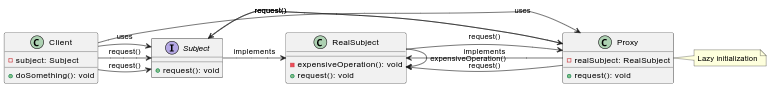

## Реализация в Python

In [1]:
from abc import ABC, abstractmethod

class Subject(ABC):
    @abstractmethod
    def request(self):
        pass

class RealSubject(Subject):
    def expensive_operation(self):
        print("RealSubject: Performing an expensive operation...")
    
    def request(self):
        self.expensive_operation()
        print("RealSubject: Handling request.")

class Proxy(Subject):
    def __init__(self, real_subject: RealSubject):
        self._real_subject = real_subject
    
    def request(self):
        if self.check_access():
            self._real_subject.request()
            self.log_access()
    
    def check_access(self):
        print("Proxy: Checking access prior to firing a real request.")
        return True
    
    def log_access(self):
        print("Proxy: Logging the time of request.")

class Client:
    def __init__(self, subject: Subject):
        self._subject = subject
    
    def do_something(self):
        self._subject.request()

if __name__ == "__main__":
    real_subject = RealSubject()
    proxy = Proxy(real_subject)
    client = Client(proxy)

    client.do_something()

Proxy: Checking access prior to firing a real request.
RealSubject: Performing an expensive operation...
RealSubject: Handling request.
Proxy: Logging the time of request.
